In [10]:
# Implement Quantum Teleportation algorithm in Python

In [11]:
# !pip install qiskit
# !pip install matplotlib
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile



In [12]:
# Create a quantum circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(3, 3)



In [13]:
# Step 1: Apply an X gate on qubit 0 to prepare it in the state |1>
circuit.x(0)

# Add a barrier to separate different stages in the circuit for clarity
circuit.barrier(range(3))

# Step 2: Apply Hadamard gate to qubit 1 to put it in superposition state
circuit.h(1)

# Step 3: Apply CNOT gate to qubits 1 and 2 to create an entangled pair (Bell state)
circuit.cx(1, 2)

# Step 4: Entangle qubit 0 (Sharanya's qubit) with qubit 1
circuit.cx(0, 1)

# Step 5: Apply Hadamard gate to qubit 0 to create the superposition for teleportation
circuit.h(0)

# Add a barrier to separate stages of the circuit
circuit.barrier(range(3))

# Step 6: Measure qubits 0 and 1, storing results in classical bits 0 and 1
circuit.measure(range(2), range(2))

# Add a barrier before performing any further operations
circuit.barrier(range(3))

# Step 7: Apply CNOT gate to qubits 1 and 2 based on the classical bits measurement
circuit.cx(1, 2)

# Step 8: Apply CZ gate to qubits 0 and 2 to correct the state of Kartik’s qubit
circuit.cz(0, 2)

# Draw the quantum circuit diagram for visualization
circuit.draw()



┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

Simulation

In [14]:
# Step 9: Use the AerSimulator backend to simulate the quantum circuit
backend = AerSimulator()



In [15]:
# Step 10: Transpile the circuit for the backend
qc_compiled = transpile(circuit, backend)



In [16]:
# Step 11: Run the simulation with 1024 shots
job_sim = backend.run(qc_compiled, shots=1024)

# Step 12: Retrieve the result of the simulation
result_sim = job_sim.result()




In [17]:
# Step 13: Get the counts (measurement outcomes) from the result
counts = result_sim.get_counts(qc_compiled)

# Print the measurement counts to see the results
print(counts)



{'010': 249, '001': 268, '000': 256, '011': 251}


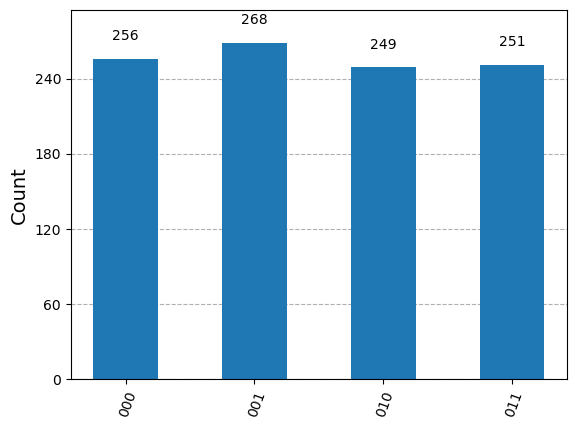

In [18]:
# Step 14: Plot a histogram of the measurement results
plot_histogram(counts)
